# Exercises in Fairness in Machine Learning
## From "Exercises in Fairness in Machine Learning.ipynb" March 10, 2025
(use venv_requirements.txt)

•The hand-in exercise for this topic is Exercise 1 from the notebook “Exercises in Fairness
in Machine Learning.ipynb”.

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Exercise 1

For this exercise, we will use the `adult` dataset (available on moodle or from the [UCI Machine Learning repository](https://archive.ics.uci.edu/dataset/2/adult)). Do the following:

1. Load in the dataset and correct the error in the income column (replace the "." with the empty string such that there are only two categories).
2. Create an X dataset using the variables "age", "workclass", "education", "occupation", "race", "sex", "hours-per-week". For the categorical variables with missing values, replace the missing values with a new category "Unknown". Also replace any values that are "?" with the value "Unknown (using `str.replace`, for instance)
3. Turn the five categorical variables in X into dummy variables and remove the original five variables (This will probably give you around 44 columns in X)
4. Create the response variable y, such that it is 1 if the `income` variable in the adult dataset is `>50K` and 0 if the value is `<=50K`.
5. Do a train-test split with 30% of the data for test (using `random_state=123`) and train a `XGBoost` classification model on the training data.
6. Evaluate your models using various evaluation metrics and look at the confusion matrix of your model.
7. To be able to calculate the various fairness metrics in regard to the variable `sex`, we need to construct two separate confusion matrices for the test dataset, one for `female` and one for `male`. First, create separate test sets for `female` and `male` as well as the predicted values for each gender. That is, create `X_test_female`, `X_test_male`, `y_test_female`, `y_test_male`, `y_pred_female`, and `y_pred_male`. (Hint: You can create `X_test_female` by `X_test_female = X_test[X_test["sex_Male"] == 0]` and `y_test_male` by `y_test_male = y_test[X_test["sex_Male"] == 1]`, for instance.)
8. Calculate the accuracy for female and male for the XGBoost model and comment on the results.
9. We can now create the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) for each gender. That is, calculate the eight values `TP_f`, `TN_f`, `FP_f`, `FN_f`, `TP_m`, `TN_m`, `FP_m`, and `FN_m`. (Hint: You can calculate the False Positive for female (FP_f) by `FP_f = sum((y_test_female == 0) & (y_pred_female == 1))`.)
10. Is there error rate balance across different genders, i.e. are the false positive rate (FPR) and false negative rate (FNR) the same across the two genders?
11. Is there predictive parity across different genders?
12. Is there Statistical parity across different genders?
13. [Discussion question] Can your any of your models be used to make fair salary predictions?
14. [Discussion question] In what sense is the `adult` dataset biased (unfair)?
15. [Discussion question] If the dataset is biased, where could the bias potentially come from?
16. [Optional] If you balance the number of males and females in the dataset (like we balanced the response variable in the Churn example), will you model become more fair?

#### 1. Load in the dataset and correct the error in the income column (replace the "." with the empty string such that there are only two categories).

In [56]:
adult = pd.read_csv('..\\data\\adult.csv')
adult['income'] = adult['income'].replace({"<=50K." : "<=50K", ">50K.": ">50K" })

#### 2. Create an X dataset using the variables "age", "workclass", "education", "occupation", "race", "sex", "hours-per-week". For the categorical variables with missing values, replace the missing values with a new category "Unknown". Also replace any values that are "?" with the value "Unknown (using `str.replace`, for instance)

In [57]:
X = adult[["age", "workclass", "education", "occupation", "race", "sex", "hours-per-week"]]
X.loc[:, ["workclass", "education", "occupation"]] = X[["workclass", "education", "occupation"]].fillna('Unknown')
X.loc[:, ['workclass', 'education', 'occupation']] = X.replace("?", "Unknown")


#### 3. Turn the five categorical variables in X into dummy variables and remove the original five variables (This will probably give you around 44 columns in X)

In [58]:
X = pd.get_dummies(X, columns=["workclass", "education", "occupation", "race", "sex"], drop_first=True).astype(int)
# 44 columns, allright
X



,age,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,50,13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,53,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,36,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48838,64,40,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
48839,38,50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
48840,44,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [59]:
y = adult[['income']]
y = y['income'].map({'<=50K': 0, '>50K': 1})

#### 5. Do a train-test split with 30% of the data for test (using `random_state=123`) and train a `XGBoost` classification model on the training data.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

c:\Users\Hassan\miniconda3\envs\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:28:14] WARNING: D:\bld\xgboost-split_1738880195977\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

#### 6. Evaluate your models using various evaluation metrics and look at the confusion matrix of your model.

In [61]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8195591346481949
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     11166
           1       0.67      0.47      0.55      3487

    accuracy                           0.82     14653
   macro avg       0.76      0.70      0.72     14653
weighted avg       0.81      0.82      0.81     14653

Confusion Matrix:
[[10361   805]
 [ 1839  1648]]


Accuracy: 0.8195591346481949
Around 82% of predictions made are correct.

The model is better at classifiying 0, than 1. 
That is better at classifying cases where individuals income are "<=50K", than individuals whose income is >50K.
This is due to the overrepresentation of cases where individuals are earning "<=50K".
I expect we will see the same for males and females, as there is also a disparity there.


True Negatives: 10,361
False Positives: 805
False Negatives: 1,839
True Positives: 1,648

The model is better at predicting TN correctly, than TP.



#### 7. To be able to calculate the various fairness metrics in regard to the variable `sex`, we need to construct two separate confusion matrices for the test dataset, one for `female` and one for `male`. First, create separate test sets for `female` and `male` as well as the predicted values for each gender. That is, create `X_test_female`, `X_test_male`, `y_test_female`, `y_test_male`, `y_pred_female`, and `y_pred_male`. (Hint: You can create `X_test_female` by `X_test_female = X_test[X_test["sex_Male"] == 0]` and `y_test_male` by `y_test_male = y_test[X_test["sex_Male"] == 1]`, for instance.)

In [62]:
#seperate test set based on gender
X_test_female = X_test[X_test["sex_Male"] == 0]
X_test_male = X_test[X_test["sex_Male"] == 1]

#seperate true labels based on gender
y_test_female = y_test[X_test["sex_Male"] == 0]
y_test_male = y_test[X_test["sex_Male"] == 1]

#seperate pred values based on gender
y_pred_female = y_pred[X_test["sex_Male"] == 0]
y_pred_male = y_pred[X_test["sex_Male"] == 1]

#### 8. Calculate the accuracy for female and male for the XGBoost model and comment on the results.


In [63]:
#calculating the acc on each gender
accuracy_male = accuracy_score(y_test_male, y_pred_male)
print(f'Accuracy for males for the XGBoost model: {accuracy_male}')
accuracy_female = accuracy_score(y_test_female, y_pred_female)
print(f'Accuracy for females for the XGBoost model: {accuracy_female}')

Accuracy for males for the XGBoost model: 0.7806919073374834
Accuracy for females for the XGBoost model: 0.8980222496909765


The model predicts the income level ('<=50K': 0, '>50K': 1) for almost 90% of females.
While it looks like the model is performing significantly better for females than males - however this might be deceptive as we know the data is skewed.

#### 9. We can now create the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) for each gender. That is, calculate the eight values `TP_f`, `TN_f`, `FP_f`, `FN_f`, `TP_m`, `TN_m`, `FP_m`, and `FN_m`. (Hint: You can calculate the False Positive for female (FP_f) by `FP_f = sum((y_test_female == 0) & (y_pred_female == 1))`.)


In [64]:
cm_male = confusion_matrix(y_test_male, y_pred_male)
cm_female = confusion_matrix(y_test_female, y_pred_female)

print(f'Confusion matrix for males: \n{confusion_matrix(y_test_male, y_pred_male)}')
print('\n')
print(f'Confusion matrix for females: \n{confusion_matrix(y_test_female, y_pred_female)}')

FP_m, TN_m = cm_male[0]
FN_m, TP_m = cm_male[1]

#calculating FPR and FNR for both genders
fpr_m = FP_m / (FP_m + TN_m)
fnr_m = FN_m / (FN_m + TP_m)
print('\n')


print(f'False Postive Rate for males: \n{fpr_m}')
print(f'False Negative Rate for males: \n{fnr_m}')
print('\n')

FP_f, TN_f = cm_female[0]
FN_f, TP_f = cm_female[1]

# Calculate FPR and FNR
fpr_f = FP_f / (FP_f + TN_f)
fnr_f = FN_f / (FN_f + TP_f)

print(f'False Postive Rate for females: \n{fpr_f}')
print(f'False Negative Rate for females: \n{fnr_f}')
print('\n')

Confusion matrix for males: 
[[6058  738]
 [1411 1592]]


Confusion matrix for females: 
[[4303   67]
 [ 428   56]]


False Postive Rate for males: 
0.8914067098293114
False Negative Rate for males: 
0.4698634698634699


False Postive Rate for females: 
0.9846681922196796
False Negative Rate for females: 
0.8842975206611571




#### 10. Is there error rate balance across different genders, i.e. are the false positive rate (FPR) and false negative rate (FNR) the same across the two genders?


Our targets are 0 and 1.
That is <=50K and >50K.

False Positive Rate: 
The amount of actual negatives that incorrectly is classified as positives.
So the amount of individuals classified to be earning <=50K, who actually earn >50K.

False Negative Rate:
The amount of actual positives, incorrectly classified as negatives.
So the individuals incorrectly classified as earning >50K, because they actually earn <=50K.

For our data (rounded):
### False Positive Rate (FPR)
   Gender  | FPR    |
 |---------|--------|
 | Males   | 0.8914 |
 | Females | 0.9847 |

FPR is very high for females, males too, but not as much.
Meaning females are more likely to be incorrecly classified as earning <=50K, than men.

### False Negative Rate (FNR)
 | Gender  | FNR    |
 |---------|--------|
 | Males   | 0.4699 |
 | Females | 0.8843 |

FNR is also higher for females than men, but this the disparitiy is huge like 41.44%.
This means that females are almost 40% more likely to be wrongly classified as earning <=50K, when they actual earn >50K.

To conclude, no the FNR and FPR is not the same, and yes there is a high error rate especially for females. 

#### 11 and 12. Is there predictive parity and/or statistical parity across different genders?

We say there is predictive parity if the probability to be classified as 1 (postive, eg. >50K) is the same accross different groups (male and female) that are earning >50K. (i think) 
So the model should have the same accuracy in predicting positive outcomes regardless of group. 

We say there is statistical parity when the probability to be classified as 1 regardless of the outcome.

As for the question, the model has incredibily lower accuracy in predicting positive outcomes for females, which is most likely due to the large discreptancy in the dataset. We have a lot more females than males in the dataset, and of those females a proportionally smaller amount of them has an income of more than 50K (1, positive).
We can see the there is a difference in Male predective parity and Female predective parity. 
So no. No there is no predective parity across the genders.

As for statistical pairty - The metric here is significantly larger for males, than females - again indicating there is no statistical parity.
Meaning the model here is predicting more women to be earning less than 50K (negative, 0).


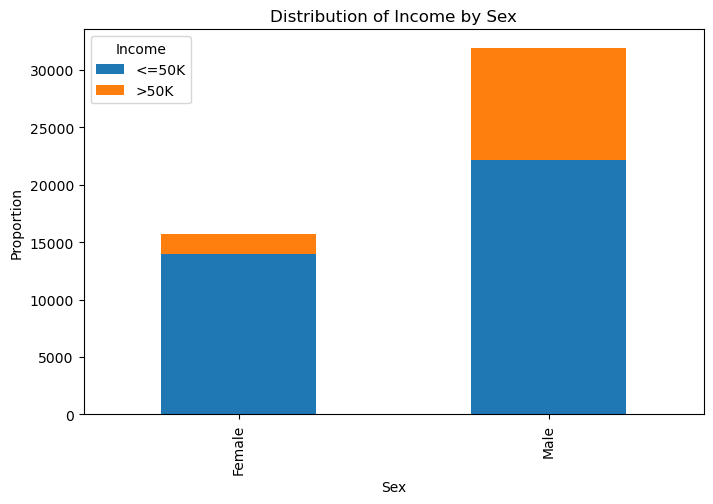

In [65]:
import matplotlib.pyplot as plt
#I made this way back in "1_Data transformation and exploratory data analysis (EDA).ipynb", brought it back to display the bias in the dataset.

#making a copy, to not pollute the O.G dataset
incomeXsex = adult.copy()

#fixing up the errors in income
incomeXsex = incomeXsex.replace({"<=50K." : "<=50K", ">50K.": ">50K" })

#removing anything containing N/A values
incomeXsex = incomeXsex.dropna()

#unsure if there are any other issues, but we roll with this for now

sex_income_ct = pd.crosstab(incomeXsex['sex'], incomeXsex['income'])

# Stacked bar plot
sex_income_ct.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Distribution of Income by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.legend(title='Income')
plt.show()


In [ ]:
def calculate_parity_metrics(conf_matrix):
    
    tn, fp = conf_matrix[0]
    fn, tp = conf_matrix[1]

    # Add together the confusion matrics indices to get the total_population
    total_population = tn + fp + fn + tp

    # predictive parity
    pp = tp / (tp + fp) if (tp + fp) != 0 else 0

    # statistical parity
    sp = (tp + fp) / total_population

    return pp, sp

pp_male, sp_male = calculate_parity_metrics(cm_male)
pp_female, sp_female = calculate_parity_metrics(cm_female)

print("Male PP:", pp_male)
print("Male SP:", sp_male)
print("Female PP:", pp_female)
print("Female SP:", sp_female)

Male PP: 0.6832618025751073
Male SP: 0.23777936524135115
Female PP: 0.45528455284552843
Female SP: 0.02533992583436341


#### 13. [Discussion question] Can your any of your models be used to make fair salary predictions?
Since fair, in my opinion requires the predictions for all groups are required to be done without systematic bias, I would say, no.
But if you put fairness aside, it should be able to make accurate predictions in terms of salary for men. The model had high accuarcy and prediction and recall values. - So it is useful for something.

#### 14. [Discussion question] In what sense is the `adult` dataset biased (unfair)?
Regardless of any model you make based on this dataset, it will always be favoured to predict females to earn less than 50K more frequently than men across age, occupation, race, education and workclass.

#### 15. [Discussion question] If the dataset is biased, where could the bias potentially come from?
I have touched upon that through out the notebook - The model is only biased because the underlying data its trained on is biased.
It seems the data collected only has about half the women as it has men in it.
Looking at the "Distribution of income by sex" plot you can see how of those women only about 10% of them are making more than 50K.
The issue could stem from whoever collected the data did not ensure that their number of respondents reflected the demograhpic they were attempting to capture.


#### 16. [Optional] If you balance the number of males and females in the dataset (like we balanced the response variable in the Churn example), will you model become more fair?

I am not certain, in one sense yes, however we can not be certain that we capture the ground truth a demographicically representative dataset would display. 
This dataset is only useful for predictions about men in the given demographic. But even that is under doubt as the dataset contains such a big gap for women who's to say it is optimal for men?
